In [7]:
import pandas as pd
import glob

# Scenario options dictionary
scenario_options = {
    'redchris': ['no_cons','evenflow_cons', 'bau_redchrs', 'redchrs_AAC_90%', 'redchrs_AAC_80%', 'redchrs_AAC_70%', 'redchrs_AAC_60%', 'redchrs_AAC_50%', 'redchrs_AAC_40%', 'redchrs_AAC_30%', 'redchrs_AAC_20%', 'redchrs_AAC_10%' ],
    'goldenbear': ['no_cons', 'evenflow_cons', 'bau_gldbr', 'gldbr_AAC_90%', 'gldbr_AAC_80%', 'gldbr_AAC_70%', 'gldbr_AAC_60%', 'gldbr_AAC_50%', 'gldbr_AAC_40%', 'gldbr_AAC_30%', 'gldbr_AAC_20%', 'gldbr_AAC_10%'],
    'equitysilver': [ 'no_cons','evenflow_cons', 'bau_eqtslvr', 'eqtslvr_AAC_90%', 'eqtslvr_AAC_80%', 'eqtslvr_AAC_70%', 'eqtslvr_AAC_60%', 'eqtslvr_AAC_50%', 'eqtslvr_AAC_40%', 'eqtslvr_AAC_30%', 'eqtslvr_AAC_20%', 'eqtslvr_AAC_10%'],
    'test': ['no_cons', 'evenflow_cons', 'bau_redchrs']
}

case_study = ['redchris', 'goldenbear', 'equitysilver']
obj_mode = ['max_hv', 'min_ha', 'max_st', 'min_em']

# Loop through each case study
for case in case_study:
    for mode in obj_mode:
        for scenario_name in scenario_options[case]:
            # Build the file pattern dynamically
            file_pattern = f'{case}_{mode}_{scenario_name}_cbm_output_2.csv'
            files = glob.glob(file_pattern)
            
            # Dictionary to store results
            net_emission_sums = {}

            # Loop through each file
            for file_path in files:
                # Read the CSV file
                data = pd.read_csv(file_path)
                
                # Calculate the sum of the 'Net emission' column
                net_emission_sum = data['Net emission'].sum()
                
                # Store the result in the dictionary with the filename as the key
                net_emission_sums[file_path] = net_emission_sum

            # Print the results
            for file, total in net_emission_sums.items():
                print(f"Total Net emission for {file}: {total}")

Total Net emission for equitysilver_max_hv_no_cons_cbm_output_2.csv: 2860992.618537843
Total Net emission for equitysilver_max_hv_evenflow_cons_cbm_output_2.csv: 44209174.60710718
Total Net emission for equitysilver_max_hv_bau_eqtslvr_cbm_output_2.csv: -10187414.263133507
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_90%_cbm_output_2.csv: -20190655.621586952
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_80%_cbm_output_2.csv: -37717399.64487405
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_70%_cbm_output_2.csv: -53571451.0172023
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_60%_cbm_output_2.csv: -69020879.6592295
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_50%_cbm_output_2.csv: -83747319.36786279
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_40%_cbm_output_2.csv: -96901488.83035089
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_30%_cbm_output_2.csv: -116527826.65354964
Total Net emission for equitysilver_max_hv_eqtslvr_AAC_

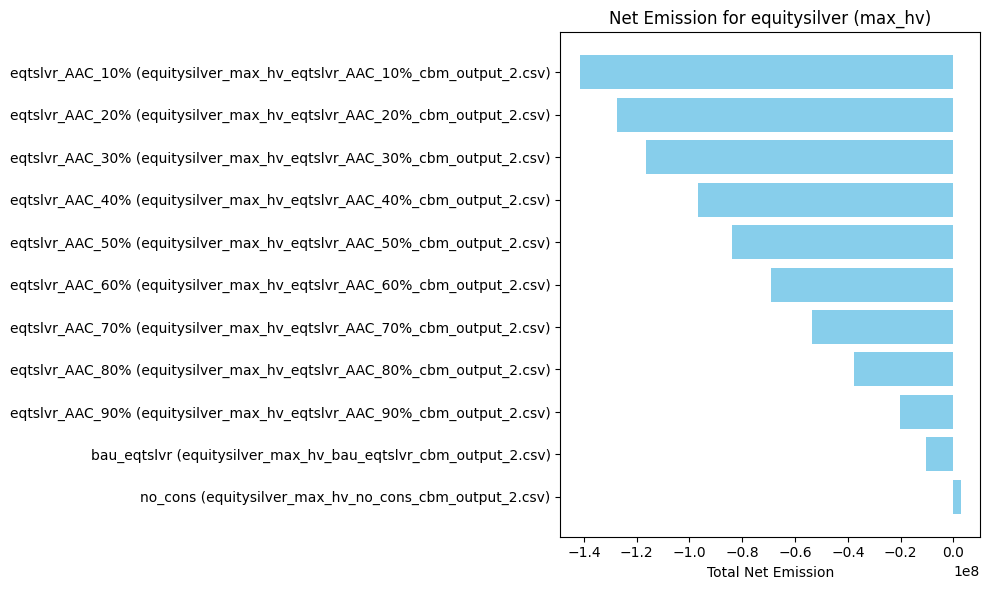

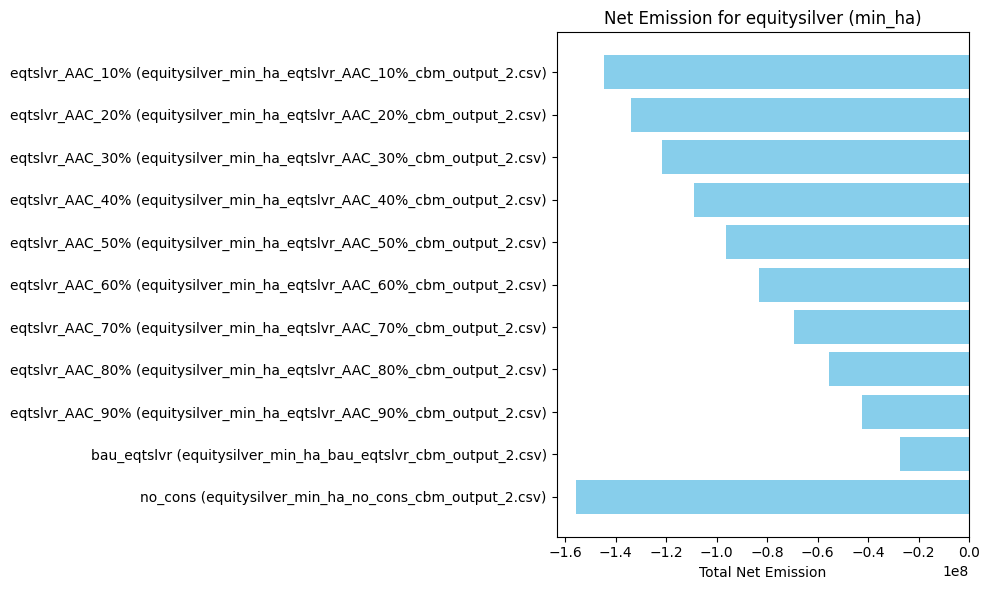

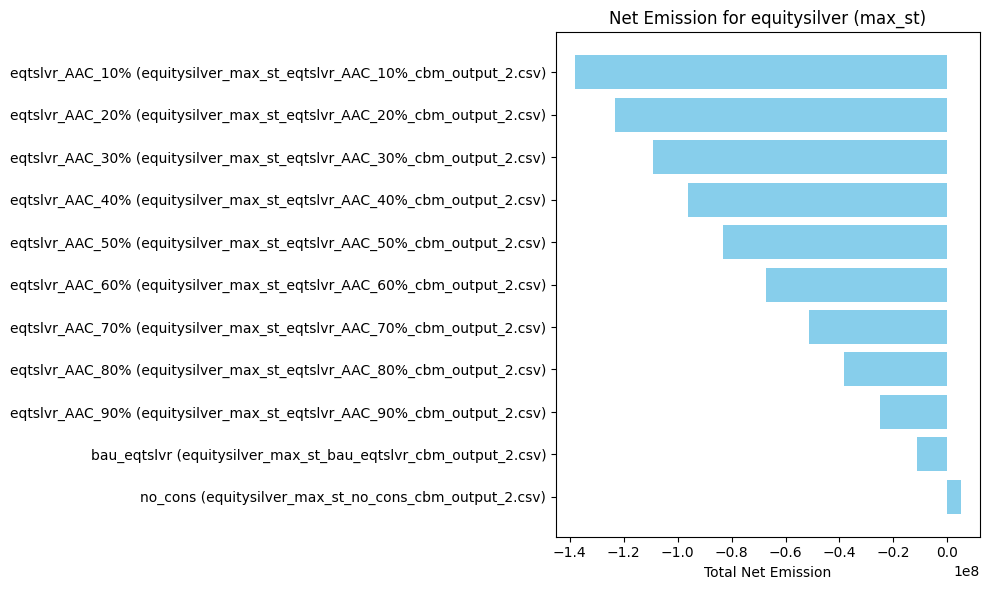

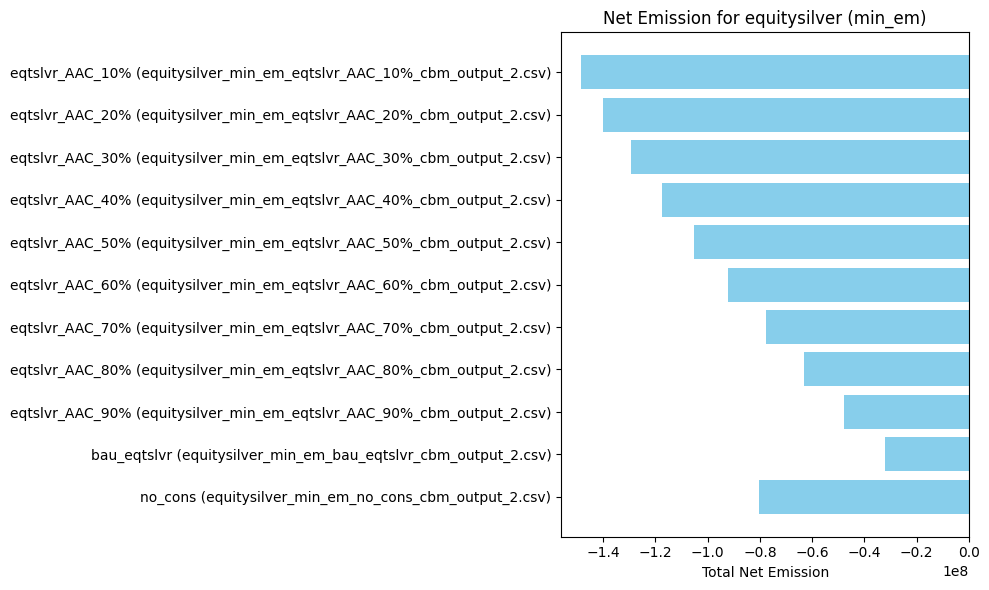

In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Scenario options dictionary
scenario_options = {
    'redchris': ['no_cons', 'bau_redchrs', 'redchrs_AAC_90%', 'redchrs_AAC_80%', 'redchrs_AAC_70%', 'redchrs_AAC_60%', 'redchrs_AAC_50%', 'redchrs_AAC_40%', 'redchrs_AAC_30%', 'redchrs_AAC_20%', 'redchrs_AAC_10%' ],
    'goldenbear': ['no_cons','bau_gldbr', 'gldbr_AAC_90%', 'gldbr_AAC_80%', 'gldbr_AAC_70%', 'gldbr_AAC_60%', 'gldbr_AAC_50%', 'gldbr_AAC_40%', 'gldbr_AAC_30%', 'gldbr_AAC_20%', 'gldbr_AAC_10%'],
    'equitysilver': [ 'no_cons', 'bau_eqtslvr', 'eqtslvr_AAC_90%', 'eqtslvr_AAC_80%', 'eqtslvr_AAC_70%', 'eqtslvr_AAC_60%', 'eqtslvr_AAC_50%', 'eqtslvr_AAC_40%', 'eqtslvr_AAC_30%', 'eqtslvr_AAC_20%', 'eqtslvr_AAC_10%'],
}

case_study = ['redchris', 'goldenbear', 'equitysilver']
obj_mode = ['max_hv', 'min_ha', 'max_st', 'min_em']

# Loop through each case study
for case in case_study:
    for mode in obj_mode:
        # Initialize lists for available scenarios
        scenario_names = []
        net_emissions = []

        for scenario_name in scenario_options[case]:
            # Build the file pattern dynamically
            file_pattern = f'{case}_{mode}_{scenario_name}_cbm_output_2.csv'
            files = glob.glob(file_pattern)

            # If there are any matching files for the scenario
            if files:
                for file_path in files:
                    # Read the CSV file
                    data = pd.read_csv(file_path)
                    
                    # Calculate the sum of the 'Net emission' column
                    net_emission_sum = data['Net emission'].sum()

                    # Append the scenario and net emission sum to the lists
                    scenario_names.append(f'{scenario_name} ({file_path})')
                    net_emissions.append(net_emission_sum)

        # Plot only if there are any available scenarios for this case and mode
        if scenario_names:
            plt.figure(figsize=(10, 6))
            plt.barh(scenario_names, net_emissions, color='skyblue')
            plt.xlabel('Total Net Emission')
            plt.title(f'Net Emission for {case} ({mode})')
            plt.tight_layout()
            plt.show()
